# Powr of You Assignment

## Task Overview

You are provided with an anonymized browsing history dataset in CSV format. Your task is to explore this dataset, analyze patterns in user behavior, extract meaningful insights, and visualize your findings. Your analysis should tell a compelling story about the user’s browsing habits and highlight key behavioral trends.


Analyze the browsing history dataset to uncover patterns, derive insights, and present findings through clear visualizations. Your task includes cleaning and preprocessing the data, exploring trends in user behavior, identifying key metrics, and crafting a compelling data-driven story. Use Python (and Power BI if you want) to create at least 5 pieces of analysis and visualizations that effectively communicate your insights. We are evaluating your analytical thinking, problem-solving approach, coding quality, and ability to present actionable insights in a structured report.

## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from urllib.parse import urlparse
import warnings
from collections import Counter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams['figure.figsize'] = (12, 8)


In [4]:
file_path = "dataset\py_demo_client_extension_30_20250221075805(in).csv"
data = pd.read_csv(file_path)

In [5]:
data.head()

,Summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,OrgId,ParticipantId,DeviceId,InstalledDate,AcceptanceDate,Extension,BrowsingCount,BookmarkCount,CookieCount,NaN
1,py_demo_client,demoUser@py-insights.com,2nwjevbvxzm7ehb254,2025-02-20T23:58:02-08:00,2025-02-20T23:58:20-08:00,Chrome,5104,0,0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Browsing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime


In [6]:
data.describe

<bound method NDFrame.describe of              Summary                Unnamed: 1          Unnamed: 2  \
0              OrgId             ParticipantId            DeviceId   
1     py_demo_client  demoUser@py-insights.com  2nwjevbvxzm7ehb254   
2                NaN                       NaN                 NaN   
3           Browsing                       NaN                 NaN   
4              OrgId             ParticipantId            DeviceId   
...              ...                       ...                 ...   
5104  py_demo_client                      demo  2nwjevbvxzm7ehb254   
5105  py_demo_client                      demo  2nwjevbvxzm7ehb254   
5106  py_demo_client                      demo  2nwjevbvxzm7ehb254   
5107  py_demo_client                      demo  2nwjevbvxzm7ehb254   
5108  py_demo_client                      demo  2nwjevbvxzm7ehb254   

                                             Unnamed: 3  \
0                                         InstalledDate   
1      

In [7]:
data.columns

Index(['Summary', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [8]:
data.shape

(5109, 10)

## Cleaning the Raw Dataset


In [18]:
with open(file_path, 'r', encoding="utf8") as file:
    content = file.read()

lines = content.split('\n')
browsing_start = -1
for i, line in enumerate(lines):
    
    if 'Browsing' in line.split(",")[0]:
        browsing_start = i + 1  # Next line is the header
        break
print("Browsing Exists in Line", browsing_start)

Browsing Exists in Line 5


In [19]:
# Extract browsing data
browsing_lines = lines[browsing_start:]
browsing_content = '\n'.join(browsing_lines)
browsing_lines

['OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime',
 'py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaefjnlga/snapshot.html,2025-02-21T07:58:02.688Z,link,,166328,0,2025-02-20T23:58:02-08:00',
 'py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snapshot/hkmmnfimlpcphpgnmgdecpdpaefjnlga?orgId=py_demo_client&product=snapshot&participantId=user@email.com&pli=1,2025-02-21T07:57:51.308Z,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20T23:57:51-08:00',
 'py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?source=d_snapshot,2025-02-21T07:57:40.972Z,link,PY Insights | Product,166319,0,2025-02-20T23:57:40-08:00',
 'py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?source=d_snapshot,2025-02-21T07:57:40.988Z,link,PY Insights | Product,166321,0,2025-02-20T23:57:40-08:00',
 'py_demo_client,demo,2nwjevbvxzm7ehb254

## Generating back the Dataframe

In [21]:
from io import StringIO

raw_data = pd.read_csv(StringIO(browsing_content))

clean_data = raw_data.copy()

# Remove invalid records
clean_data = clean_data.dropna(subset=['url', 'eventtimeutc'])
clean_data = clean_data[
    (clean_data['url'].str.startswith('http')) | 
    (clean_data['url'].str.startswith('chrome-extension'))
]

# Convert timestamps
clean_data['eventtimeutc'] = pd.to_datetime(clean_data['eventtimeutc'])
clean_data['eventtime'] = pd.to_datetime(clean_data['eventtime'])

# Extract additional features

clean_data['hour'] = clean_data['eventtimeutc'].dt.hour
clean_data['day_of_week'] = clean_data['eventtimeutc'].dt.day_name()
clean_data['date'] = clean_data['eventtimeutc'].dt.date


In [22]:
clean_data.head()

,OrgId,ParticipantId,DeviceId,url,eventtimeutc,transition,title,visitId,referringVisitId,eventtime,hour,day_of_week,date
0,py_demo_client,demo,2nwjevbvxzm7ehb254,chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...,2025-02-21 07:58:02.688000+00:00,link,NaN,166328,0,2025-02-20 23:58:02-08:00,7,Friday,2025-02-21
1,py_demo_client,demo,2nwjevbvxzm7ehb254,https://chromewebstore.google.com/detail/snaps...,2025-02-21 07:57:51.308000+00:00,link,Snapshot - Chrome Web Store,166327,166326,2025-02-20 23:57:51-08:00,7,Friday,2025-02-21
2,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.972000+00:00,link,PY Insights | Product,166319,0,2025-02-20 23:57:40-08:00,7,Friday,2025-02-21
3,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product?s...,2025-02-21 07:57:40.988000+00:00,link,PY Insights | Product,166321,0,2025-02-20 23:57:40-08:00,7,Friday,2025-02-21
4,py_demo_client,demo,2nwjevbvxzm7ehb254,https://py-insights.com/account/demo/product,2025-02-21 07:57:38.017000+00:00,link,PY Insights | Product,166318,0,2025-02-20 23:57:38-08:00,7,Friday,2025-02-21


In [24]:
clean_data.describe()

,visitId,referringVisitId,hour
count,5099.000000,5099.000000,5099.000000
mean,163243.422044,69321.093940,10.849578
std,1742.716723,80747.019855,7.069842
min,160209.000000,0.000000,0.000000
25%,161753.500000,0.000000,5.000000
50%,163206.000000,0.000000,10.000000
75%,164743.500000,162933.000000,17.000000
max,166328.000000,166326.000000,23.000000


## Data Preprocessing

In [26]:
def extracting_domain(url):
    """Extract domain from URL"""
    try:
        domain = urlparse(url).netloc
        return domain.replace('www.', '') if domain.startswith('www.') else domain
    except:
        return 'unknown'

In [27]:
clean_data['domain'] = clean_data['url'].apply(extracting_domain)

In [30]:
clean_data['domain'].unique()

array(['hkmmnfimlpcphpgnmgdecpdpaefjnlga', 'chromewebstore.google.com',
       'py-insights.com', 'cs-rtl.my.salesforce-sites.com',
       'docs.google.com', 'teams.microsoft.com',
       'joinmosaic.myaccountinfo.com', 'mermaidchart.com',
       'my.1password.com', 'macys.com', 'qksrv.net', 'parade.com',
       'nbcbayarea.com', 'sfgate.com', 'chatgpt.com', 'htmltemplates.co',
       'shud.in', 'v0-shud-in-clone.vercel.app', 'loopnet.com', 'msn.com',
       'play.google.com', 'google.com', 'frequentmiler.com',
       'instacart.com', 'app.pinecone.io', 'accounts.google.com',
       'login.pinecone.io', 'pinecone.io', 'photos.google.com',
       'easylunches.com', 'chefstore.com', 'ubereats.com', 'samsclub.com',
       'costco.com', 'signin.costco.com', 'amazon.com', 'beyondmeat.com',
       'skydiveperris.com', 'laist.com', 'virginexperiencegifts.com',
       'giftory.com', 'people.com', 'reddit.com', 'etsy.com',
       'markandgraham.com', 'gozerog.com', 'timeanddate.com',
       'fi

In [34]:
## Finding out the peak hours and days in the browsing dataset
hourly_counts = clean_data['hour'].value_counts().sort_index()
peak_hours = hourly_counts.nlargest(10)
peak_hours

hour
5     498
4     466
6     332
18    300
19    287
17    283
7     275
22    260
11    225
0     224
Name: count, dtype: int64

In [33]:
daily_counts = clean_data['date'].value_counts().sort_index()
most_active_days = daily_counts.nlargest(5)
most_active_days

date
2025-01-29    665
2025-02-19    557
2025-02-20    262
2025-02-03    241
2025-01-30    240
Name: count, dtype: int64

## Data Visualizaton

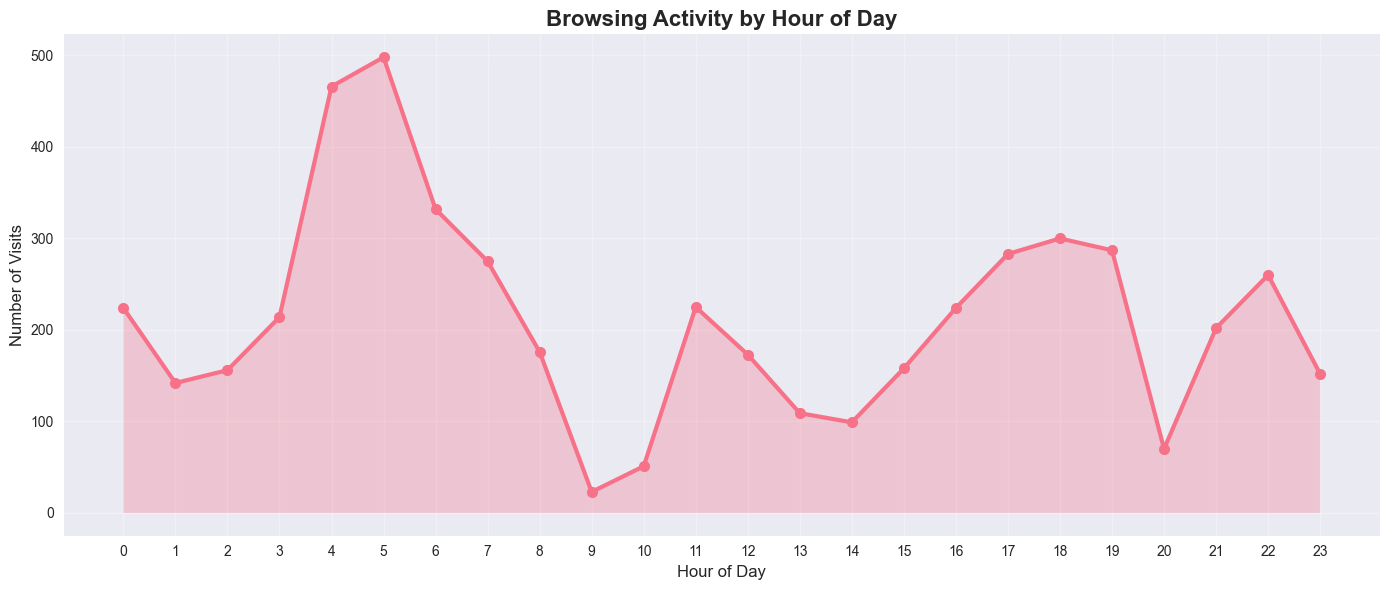

In [35]:
plt.figure(figsize=(14, 6))
hourly_data = hourly_counts
plt.plot(hourly_data.index, hourly_data.values, marker='o', linewidth=3, markersize=8)
plt.fill_between(hourly_data.index, hourly_data.values, alpha=0.3)

plt.title('Browsing Activity by Hour of Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Visits', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [38]:
daily_counts

date
2025-01-21     69
2025-01-22    123
2025-01-23    171
2025-01-24    130
2025-01-25     94
2025-01-26     52
2025-01-27    232
2025-01-28    137
2025-01-29    665
2025-01-30    240
2025-01-31    199
2025-02-01     88
2025-02-02    185
2025-02-03    241
2025-02-04    198
2025-02-05     39
2025-02-06    160
2025-02-07     74
2025-02-08     22
2025-02-09     54
2025-02-10     17
2025-02-11     87
2025-02-12    121
2025-02-13     19
2025-02-14     60
2025-02-15    144
2025-02-16    213
2025-02-17    231
2025-02-18    132
2025-02-19    557
2025-02-20    262
2025-02-21     83
Name: count, dtype: int64

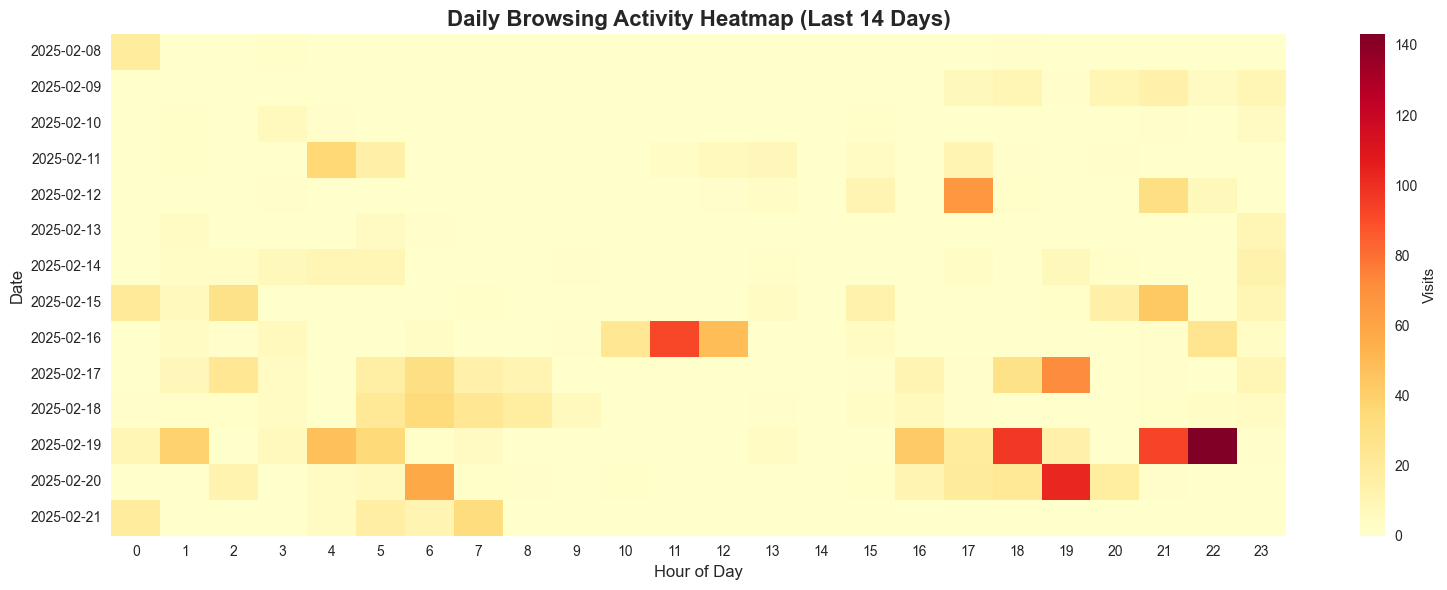

In [40]:
# plt.figure(figsize=(12, 8))
# daily_data = daily_counts
# plt.plot(daily_data.index, daily_data.values, marker='o', linewidth=3, markersize=8)
# plt.fill_between(daily_data.index, daily_data.values, alpha=0.3)

# plt.title('Browsing Activity by Days', fontsize=16, fontweight='bold')
# plt.xlabel('Day', fontsize=12)
# plt.ylabel('Number of Visits', fontsize=12)
# plt.xticks(range(0, 31))
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(16, 6))
        
# Prepare data for heatmap
clean_data['hour_day'] = clean_data['eventtimeutc'].dt.strftime('%Y-%m-%d %H')
daily_hourly = clean_data.groupby(['date', 'hour']).size().unstack(fill_value=0)

sns.heatmap(daily_hourly.tail(14), annot=False, cmap='YlOrRd', cbar_kws={'label': 'Visits'})
plt.title('Daily Browsing Activity Heatmap (Last 14 Days)', fontsize=16, fontweight='bold')
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Date', fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
clean_data['domain'].unique()

array(['hkmmnfimlpcphpgnmgdecpdpaefjnlga', 'chromewebstore.google.com',
       'py-insights.com', 'cs-rtl.my.salesforce-sites.com',
       'docs.google.com', 'teams.microsoft.com',
       'joinmosaic.myaccountinfo.com', 'mermaidchart.com',
       'my.1password.com', 'macys.com', 'qksrv.net', 'parade.com',
       'nbcbayarea.com', 'sfgate.com', 'chatgpt.com', 'htmltemplates.co',
       'shud.in', 'v0-shud-in-clone.vercel.app', 'loopnet.com', 'msn.com',
       'play.google.com', 'google.com', 'frequentmiler.com',
       'instacart.com', 'app.pinecone.io', 'accounts.google.com',
       'login.pinecone.io', 'pinecone.io', 'photos.google.com',
       'easylunches.com', 'chefstore.com', 'ubereats.com', 'samsclub.com',
       'costco.com', 'signin.costco.com', 'amazon.com', 'beyondmeat.com',
       'skydiveperris.com', 'laist.com', 'virginexperiencegifts.com',
       'giftory.com', 'people.com', 'reddit.com', 'etsy.com',
       'markandgraham.com', 'gozerog.com', 'timeanddate.com',
       'fi

In [46]:
# Filtering Top Domains

domain_counts = clean_data['domain'].value_counts().head(20)
total_visits = len(clean_data)
        
for i, (domain, count) in enumerate(domain_counts.items(), 1):
    percentage = (count / total_visits) * 100
    print(f"{i:2d}. {domain:<35} | count {count:>5} | visits ({percentage:4.1f}%) |")

 1. google.com                          | count  1328 | visits (26.0%) |
 2. upwork.com                          | count   473 | visits ( 9.3%) |
 3. mail.google.com                     | count   149 | visits ( 2.9%) |
 4. pyinsightscom.sharepoint.com        | count   140 | visits ( 2.7%) |
 5. loopnet.com                         | count   133 | visits ( 2.6%) |
 6. eu-west-1.console.aws.amazon.com    | count   128 | visits ( 2.5%) |
 7. amazon.in                           | count   123 | visits ( 2.4%) |
 8. wellfound.com                       | count   107 | visits ( 2.1%) |
 9. zipair.net                          | count   106 | visits ( 2.1%) |
10. facebook.com                        | count   104 | visits ( 2.0%) |
11. gitlab.com                          | count    71 | visits ( 1.4%) |
12. accounts.google.com                 | count    61 | visits ( 1.2%) |
13. go.xero.com                         | count    60 | visits ( 1.2%) |
14. taskrabbit.com                      | count    

In [41]:
##  Lets introduce categories to domains
# 
clean_data['domain'].unique()

array(['hkmmnfimlpcphpgnmgdecpdpaefjnlga', 'chromewebstore.google.com',
       'py-insights.com', 'cs-rtl.my.salesforce-sites.com',
       'docs.google.com', 'teams.microsoft.com',
       'joinmosaic.myaccountinfo.com', 'mermaidchart.com',
       'my.1password.com', 'macys.com', 'qksrv.net', 'parade.com',
       'nbcbayarea.com', 'sfgate.com', 'chatgpt.com', 'htmltemplates.co',
       'shud.in', 'v0-shud-in-clone.vercel.app', 'loopnet.com', 'msn.com',
       'play.google.com', 'google.com', 'frequentmiler.com',
       'instacart.com', 'app.pinecone.io', 'accounts.google.com',
       'login.pinecone.io', 'pinecone.io', 'photos.google.com',
       'easylunches.com', 'chefstore.com', 'ubereats.com', 'samsclub.com',
       'costco.com', 'signin.costco.com', 'amazon.com', 'beyondmeat.com',
       'skydiveperris.com', 'laist.com', 'virginexperiencegifts.com',
       'giftory.com', 'people.com', 'reddit.com', 'etsy.com',
       'markandgraham.com', 'gozerog.com', 'timeanddate.com',
       'fi

In [65]:
categories = {
            'Search': ['google.com/search', 'bing.com', 'duckduckgo.com', 'chrome'],
            'Email': ['mail.google.com', 'outlook.com', 'gmail.com'],
            'Freelancing/Jobs': ['upwork.com', 'wellfound.com', 'taskrabbit.com', 'linkedin.com/jobs'],
            'Work/Documents': ['sharepoint.com', 'office.com', 'docs.google.com'],
            'Cloud/DevOps': ['aws.amazon.com', 'console.aws', 'azure.com', 'cloud.google.com'],
            'E-commerce': ['amazon.', 'ebay.com', 'shopify.com', 'shopping'],
            'Social Media': ['facebook.com', 'twitter.com', 'linkedin.com', 'instagram.com'],
            'Development': ['github.com', 'gitlab.com', 'stackoverflow.com', 'codepen.io'],
            # 'Sports': ['1xBet', 'TransferMarkt', 'Dream11'],
            'Entertainment': ['netflix.com', 'youtube.com', 'spotify.com', 'twitch.tv'],
            'News': ['news', 'cnn.com', 'bbc.com', 'reddit.com'],
            'Finance': ['bank', 'xero.com', 'quickbooks.com', 'mint.com'],
            'Travel': ['zipair.net', 'booking.com', 'expedia.com', 'airbnb.com'],
            'Real Estate': ['loopnet.com', 'zillow.com', 'realtor.com']
        }

In [ ]:
def categorize_website(url, title):
    url_lower = url.lower()
    title_lower = str(title).lower() if title else ''
    
    categories = {
        'Search': ['google.com/search', 'bing.com', 'duckduckgo.com', 'chrome'],
        'Email': ['mail.google.com', 'outlook.com', 'gmail.com'],
        'Freelancing/Jobs': ['upwork.com', 'wellfound.com', 'taskrabbit.com', 'linkedin.com/jobs'],
        'Work/Documents': ['sharepoint.com', 'office.com', 'docs.google.com'],
        'Cloud/DevOps': ['aws.amazon.com', 'console.aws', 'azure.com', 'cloud.google.com'],
        'E-commerce': ['amazon.', 'ebay.com', 'shopify.com', 'shopping'],
        'Social Media': ['facebook.com', 'twitter.com', 'linkedin.com', 'instagram.com'],
        'Development': ['github.com', 'gitlab.com', 'stackoverflow.com', 'codepen.io'],
        'Entertainment': ['netflix.com', 'youtube.com', 'spotify.com', 'twitch.tv'],
        'News': ['news', 'cnn.com', 'bbc.com', 'reddit.com'],
        'Finance': ['bank', 'xero.com', 'quickbooks.com', 'mint.com'],
        'Travel': ['zipair.net', 'booking.com', 'expedia.com', 'airbnb.com'],
        'Real Estate': ['loopnet.com', 'zillow.com', 'realtor.com']
    }
    
    for category, keywords in categories.items():
        if any(keyword in url_lower for keyword in keywords):
            return category
    
    return 'Other'

In [ ]:
# 0    chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...
# 1    https://chromewebstore.google.com/detail/snaps...
# 2    https://py-insights.com/account/demo/product?s...
# 3    https://py-insights.com/account/demo/product?s...
# 4         https://py-insights.com/account/demo/product
# Name: url, dtype: object

In [60]:
clean_data['url'][:5]

0    chrome-extension://hkmmnfimlpcphpgnmgdecpdpaef...
1    https://chromewebstore.google.com/detail/snaps...
2    https://py-insights.com/account/demo/product?s...
3    https://py-insights.com/account/demo/product?s...
4         https://py-insights.com/account/demo/product
Name: url, dtype: object

In [67]:
url_sample = "https://chromewebstore.google.com/detail/snaps"
for category, keywords in categories.items():
    for keyword in keywords:
        # print(keyword)
        if keyword in url_sample:
            print(category)

Search


In [68]:
clean_data['category'] = clean_data.apply(
            lambda row: categorize_website(row['url']), axis=1
        )

In [73]:
clean_data['category'].unique()

array(['Other', 'Work/Documents', 'Finance', 'E-commerce', 'News',
       'Real Estate', 'Search', 'Email', 'Cloud/DevOps', 'Social Media',
       'Freelancing/Jobs', 'Development', 'Entertainment', 'Travel'],
      dtype=object)